KNN 알고리즘은 비선형 모델 중 하나이며 분류와 회귀 분석에 사용되는 알고리즘 방식입니다.
해당 알고리즘은 데이터에서 가장 가까운 데이터 수치들을 이용하여 예측을 진행하다보니 데이터가
밀집되어 있으면 예측 성능이 높아지는 특징을 가지고 있습니다.

KNN은 결국 해석해보면 Nearest Neighbor로 풀이에서도 나와있듯이 가장 최근접한 이웃을 찾아서 분석하는 것으로서 많은 데이터가 주어졌을 때 데이터 간의 연관점을 찾아 학습 시킬 때 자주 사용되는 것 같습니다.
(제가 다른 프로젝트들도 하면서 느낀 소감 입니다...ㅠㅠ..)

In [27]:
# 비선형 회귀 중 하나의 모델인 KNN 모델을 이용한 학습을 진행해보겠습니다
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#평균제곱오차
from sklearn.metrics import mean_squared_error

#데이터들을 불러오기 위한 라이브러리 및 학습과 테스트 파일 구분 function
from sklearn import datasets
from sklearn.model_selection import train_test_split 

#KNN 모델 선언!
from sklearn.neighbors import KNeighborsRegressor

In [28]:
#먼저 당뇨병 수치가 들어있는 데이터를 불러옵니다
diabetes=datasets.load_diabetes()

In [29]:
#일단 위 원래 데이터프레임 형식으로 제작하여 학습 및 전처리에 사용하나 샘플 데이터는 일단 바로 가져와 적용하였기에 저도 일단 동일하게 하였습니다.
train_x,test_x,train_y,test_y= train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)

In [30]:
#이웃 감지 범위를 5로 했다가 너무 3500보다 넘게 나와서
#20으로 하여 학습이 잘 되게 설정을 만졌습니다...ㅠㅠ
#그래도 이거 하단에 관련 기술해놨으니 다른것도 해보겠습니다.
knn_model=KNeighborsRegressor(n_neighbors=20)

In [31]:
#학습 시작!
knn_model.fit(train_x,train_y)

KNeighborsRegressor(n_neighbors=20)

In [32]:
#학습 한 것을 이용하여 예측 (아까 test_x로 학습 데이터를 분류해놓은 것을 이용)
knn_pre=knn_model.predict(test_x)

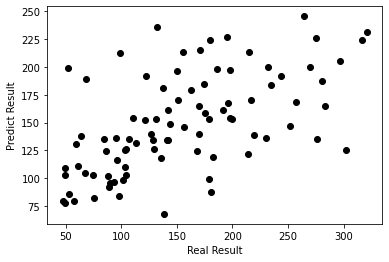

In [33]:
#모델이 예측한 값과 실체 값의 차이를 산점도를 이용하여 나타나였습니다.
plt.scatter(test_y, knn_pre, color='black')
plt.xlabel('Real Result')
plt.ylabel('Predict Result')
plt.show()

In [34]:
#평균 제곱 오차의 테스트 결과값이 test_y, 그리고 선형회귀 예측 모델을 이용해서 학습을 시켜 예상 결과가 담겨있는 res_pre
#이 두 개를 비교하여 평균 제곱 오차를 한 수치를 나타낸 것 입니다.
mse=mean_squared_error(test_y, knn_pre)
rmse=np.sqrt(mse)
rmse

58.86509739235327

In [38]:
#평균 제곱 오차의 합 계산입니다.
n = len(test_y)
res_mse = ((test_y - knn_pre) ** 2).sum() / n
res_mse
#knn 같은 경우 인접 이웃 개수를 5로 놓고 실행하면 4243로서 3500을 넘어서
#고민하다 모델을 더 단순하게 하다보니 학습률을 높아지게 되었습니다.
#인접 개수를 20정도까지 늘리니까 3500 이하가 되었습니다.

3465.099691011236